# Patryk Kaźmierczak - 253977 - Algorytmy numeryczne - Zadanie 1

### Klasy oraz funkcje

In [152]:
import math
import numpy as np


def epsilon_precision(elem, n, precision):
    return precision > abs(elem)

def N_precision(elem, n, precision):
    return n > precision

    


class EPowerX:
    def __init__(self, x, diff=False, precision=10 ** -16, precision_func=epsilon_precision):
        self.precision = precision
        self.x = x
        self.n = 0
        self.diff_from_buildin_func = diff
        self.elements_from_definition = []  # zapisane aby dwa razy nie liczyć tego samego
        self.elements_from_recursion = []  # zapisane aby dwa razy nie liczyć tego samego
        self.build_in_result = None  # zapisane aby dwa razy nie liczyć tego samego
        self.prec_func = precision_func

    def pow(self, x, n):
        result = 1
        for i in range(n):
            result *= x

        return result

    def func(self, x, n):
        return self.pow(x, n) / (math.factorial(n))

    def _is_good_precision(self, elem, n):
        return self.prec_func(elem, n, self.precision)

    def get_elems_from_definition(self):
        if not self.elements_from_definition:
            elem = 1
            n = 0
            while not self._is_good_precision(elem, n):
                self.elements_from_definition.append(elem)
                n += 1
                elem = self.func(self.x, n)
            
            self.n = n
        
        return self.elements_from_definition

    def get_elems_from_recursion(self):
        if len(self.elements_from_recursion) <= 1:
            elem = 1
            n = 0
            while not self._is_good_precision(elem, n):
                self.elements_from_recursion.append(elem)
                n += 1
                elem *= self.x / n
                
            self.n = n
        return self.elements_from_recursion

    def compute_exp(self, method="def", reverse=False):
        if method == "def":
            series = self.get_elems_from_definition()
        else:
            series = self.get_elems_from_recursion()

        if reverse:
            series.reverse()

        result = 0
        for s in series:
            result += s

        if self.diff_from_buildin_func:
            return abs(result - self.compute_from_build_in_func())

        return result
    
    def compute_exp_with_n_first_elems(self, n=50, method='def'):
        if method == "def":
            series = self.get_elems_from_definition()
        else:
            series = self.get_elems_from_recursion()

        result = 0
        for s in series[:n]:
            result += s
        
        return result
        

    def compute_from_build_in_func(self):
        if not self.build_in_result:
            self.build_in_result = math.exp(self.x)
        return self.build_in_result

    
def generate_range(min_number, max_number, number_of_negatives, number_of_positives):
    positive_increment = max_number/number_of_positives
    negative_increment = abs(min_number/number_of_negatives)

    e_powers = []

    for i in range(-number_of_negatives, 0):
        exponent = i*negative_increment
        e_powers.append(exponent)

    for i in range(number_of_positives):
        exponent = i*positive_increment
        e_powers.append(exponent)
    
    return e_powers


def get_mean_of_lists(arrays):
    return [np.mean(rg, dtype=np.float64) for rg in arrays]

def group_result_and_get_relative_error(parts, expected_results, results):
    expected_results_grouped = get_mean_of_lists(np.split(np.array(expected_results), parts))
    relative_errors = []
    for result in results:
        grouped_res = get_mean_of_lists(np.split(np.array(result), parts))
        err = np.divide(np.abs(np.subtract(expected_results_grouped, grouped_res)), expected_results_grouped)
        relative_errors.append(err)
        
    return relative_errors
    

## H1

In [129]:
min_number = -10.0
max_number = 15.0
number_of_negatives = 500000
number_of_positives = 500000
e_powers = generate_range(min_number, max_number, number_of_negatives, number_of_positives)

100%|██████████| 1000000/1000000 [00:18<00:00, 53286.18it/s]


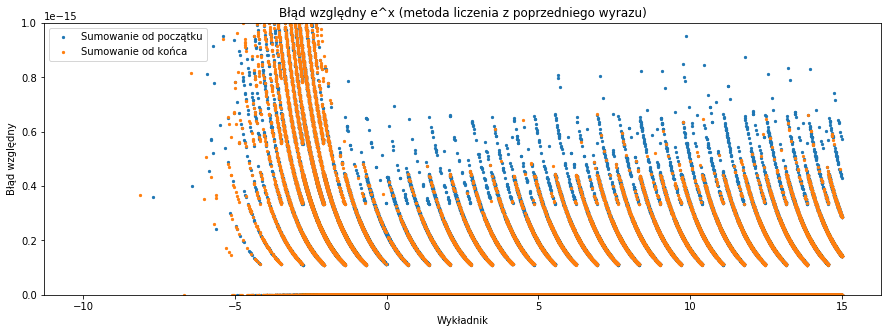

In [130]:
%matplotlib inline
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
from tqdm import tqdm
rcParams['figure.figsize'] = 15 ,5
parts = 100000


PRECISION = 10**-20

summing_from_start_results = []
summing_from_end_results = []
expected_results = []

for x in tqdm(e_powers):
    epow = EPowerX(x, False, PRECISION)
    s = epow.compute_exp(method='rec', reverse=False)
    e = epow.compute_exp(method='rec', reverse=True)
    summing_from_start_results.append(s)
    summing_from_end_results.append(e)
    expected_results.append(epow.compute_from_build_in_func())


exponents_grouped = get_mean_of_lists(np.split(np.array(e_powers), parts))
relative_errors = group_result_and_get_relative_error(parts, expected_results, [summing_from_start_results, summing_from_end_results])
plt.scatter(exponents_grouped, relative_errors[0], s=5, label='Sumowanie od początku')
plt.scatter(exponents_grouped, relative_errors[1], s=5, label='Sumowanie od końca')
p = 1*10**-15
plt.ylim(0, p)
plt.title('Błąd względny e^x (metoda liczenia z poprzedniego wyrazu)')
plt.xlabel('Wykładnik')
plt.ylabel('Błąd względny')
plt.legend()
plt.show()


100%|██████████| 1000000/1000000 [04:52<00:00, 3418.41it/s]


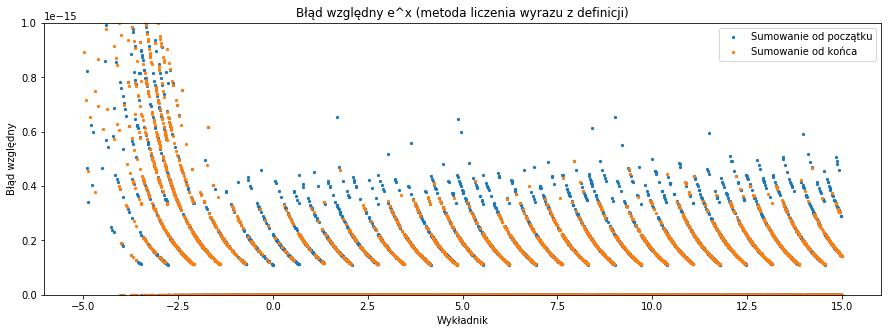

In [12]:
%matplotlib inline
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
from tqdm import tqdm
rcParams['figure.figsize'] = 15 ,5
parts = 10000


PRECISION = 10**-99

summing_from_start_results = []
summing_from_end_results = []
expected_results = []

for x in tqdm(e_powers):
    epow = EPowerX(x, False, PRECISION)
    s = epow.compute_exp(method='def', reverse=False)
    e = epow.compute_exp(method='def', reverse=True)
    summing_from_start_results.append(s)
    summing_from_end_results.append(e)
    expected_results.append(epow.compute_from_build_in_func())


exponents_grouped = get_mean_of_lists(np.split(np.array(e_powers), parts))
relative_errors = group_result_and_get_relative_error(parts, expected_results, [summing_from_start_results, summing_from_end_results])
plt.scatter(exponents_grouped, relative_errors[0], s=5, label='Sumowanie od początku')
plt.scatter(exponents_grouped, relative_errors[1], s=5, label='Sumowanie od końca')
p = 1*10**-15
plt.ylim(0, p)
plt.title('Błąd względny e^x (metoda liczenia wyrazu z definicji)')
plt.xlabel('Wykładnik')
plt.ylabel('Błąd względny')
plt.legend()
plt.show()

## H2

In [108]:
min_number = -10.0
max_number = 10.0
number_of_negatives = 500000
number_of_positives = 500000
e_powers = generate_range(min_number, max_number, number_of_negatives, number_of_positives)

100%|██████████| 1000000/1000000 [00:03<00:00, 262536.49it/s]


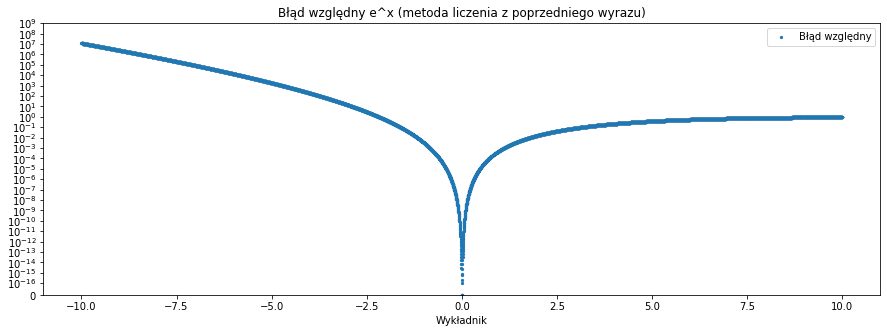

In [113]:
%matplotlib inline
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
from tqdm import tqdm
rcParams['figure.figsize'] = 15 ,5
parts = 10000

PRECISION = 5
counting_with_precision = []
expected_results = []


for x in tqdm(e_powers):
    epow = EPowerX(x, False, PRECISION, N_precision)
    s1 = epow.compute_exp(method='rec', reverse=False)
    
    counting_with_precision.append(s1)
    expected_results.append(epow.compute_from_build_in_func())


exponents_grouped = get_mean_of_lists(np.split(np.array(e_powers), parts))
relative_errors = group_result_and_get_relative_error(parts,expected_results, [counting_with_precision])

plt.scatter(exponents_grouped, relative_errors[0], s=5, label=f'Błąd względny')
plt.yscale('symlog', linthreshy=10**-16)
plt.ylim(0)
plt.title('Błąd względny e^x (metoda liczenia z poprzedniego wyrazu)')
plt.xlabel('Wykładnik')
plt.legend()
plt.show()

## H3

In [127]:
min_number = -10.0
max_number = 10.0
number_of_negatives = 400000
number_of_positives = 600000
e_powers = generate_range(min_number, max_number, number_of_negatives, number_of_positives)


In [137]:
%matplotlib inline
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
from tqdm import tqdm
rcParams['figure.figsize'] = 15 ,5
parts = 100000


PRECISION = 80
counting_from_def_results = []
counting_from_rec_results = []
expected_results = []

for x in tqdm(e_powers):
    epow = EPowerX(x, False, PRECISION, N_precision)
    r = epow.compute_exp(method='rec', reverse=False)
    d = epow.compute_exp(method='def', reverse=False)
    counting_from_rec_results.append(r)
    counting_from_def_results.append(d)
    expected_results.append(epow.compute_from_build_in_func())

    

relative_errors = group_result_and_get_relative_error(parts, expected_results, [counting_from_def_results, counting_from_rec_results])

exponents_grouped = get_mean_of_lists(np.split(np.array(e_powers), parts))


100%|██████████| 1000000/1000000 [03:02<00:00, 5468.36it/s]


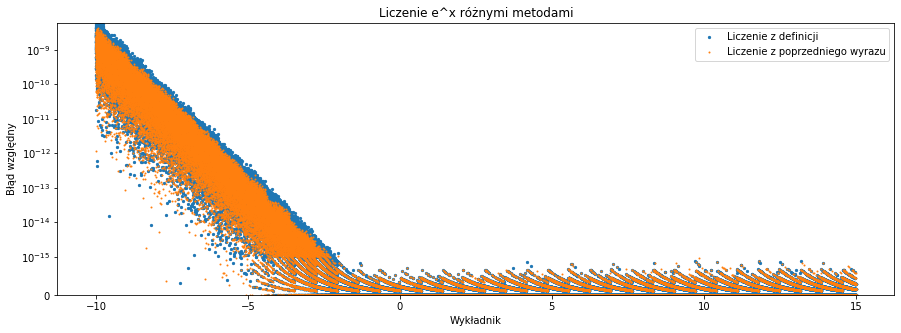

In [150]:
%matplotlib inline
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
from tqdm import tqdm
rcParams['figure.figsize'] = 15 ,5

plt.scatter(exponents_grouped, relative_errors[0], s=5, label='Liczenie z definicji')
plt.scatter(exponents_grouped, relative_errors[1], s=1, label='Liczenie z poprzedniego wyrazu')
p = 6*10**-9
plt.ylim(0, p)
plt.yscale('symlog', linthreshy=10**-15)

plt.title('Liczenie e^x różnymi metodami')
plt.xlabel('Wykładnik')
plt.ylabel('Błąd względny')
plt.legend()
plt.show()

## Q1

In [115]:
min_number = -7.0
max_number = 40.0
number_of_negatives = 300000
number_of_positives = 700000
e_powers = generate_range(min_number, max_number, number_of_negatives, number_of_positives)

In [116]:
P1 = 20
P2 = 40
P3 = 60


counting_with_p1_results = []
counting_with_p2_results = []
counting_with_p3_results = []
expected_results = []

parts = 10000

for x in tqdm(e_powers):
    epow = EPowerX(x, False, P3, N_precision)
    rp1 = epow.compute_exp_with_n_first_elems(P1, method='rec')
    rp2 = epow.compute_exp_with_n_first_elems(P2, method='rec')
    rp3 = epow.compute_exp_with_n_first_elems(P3, method='rec')
    counting_with_p1_results.append(rp1)
    counting_with_p2_results.append(rp2)
    counting_with_p3_results.append(rp3)
    expected_results.append(epow.compute_from_build_in_func())


exponents_grouped = get_mean_of_lists(np.split(np.array(e_powers), parts))
relative_errors = group_result_and_get_relative_error(parts, expected_results, [counting_with_p1_results, counting_with_p2_results, counting_with_p3_results])


100%|██████████| 1000000/1000000 [00:23<00:00, 42772.33it/s]


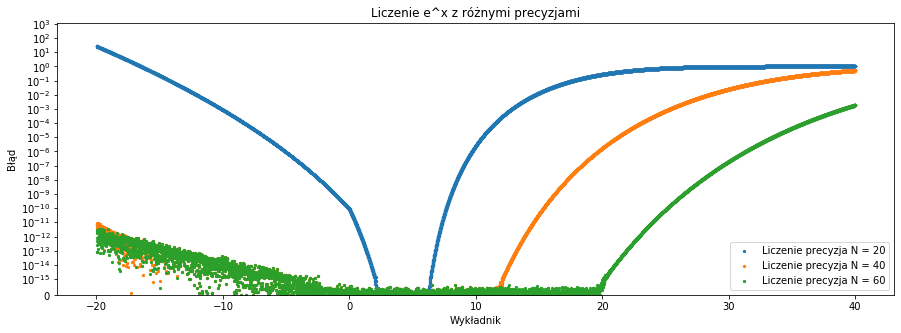

In [126]:
%matplotlib inline
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
from tqdm import tqdm
rcParams['figure.figsize'] = 15 ,5

plt.scatter(exponents_grouped, relative_errors[0], s=5, label=f'Liczenie precyzja N = {P1}')
plt.scatter(exponents_grouped, relative_errors[1], s=5, label=f'Liczenie precyzja N = {P2}')
plt.scatter(exponents_grouped, relative_errors[2], s=5, label=f'Liczenie precyzja N = {P3}')
plt.yscale('symlog', linthreshy=10**-15)
plt.ylim(0)
plt.title('Liczenie e^x z różnymi precyzjami')
plt.xlabel('Wykładnik')
plt.ylabel('Błąd')
plt.legend()
plt.show()

## Q2

In [119]:
min_number = -20.0
max_number = 40.0
number_of_negatives = 200000
number_of_positives = 800000
e_powers = generate_range(min_number, max_number, number_of_negatives, number_of_positives)

In [120]:
PRECISION = 10**-6

number_of_elements = []

for x in tqdm(e_powers):
    epow = EPowerX(x, False, PRECISION)
    epow.compute_exp(method='rec')
    number_of_elements.append(epow.n)

parts = 10000

number_of_elements_grouped = get_mean_of_lists(np.split(np.array(number_of_elements), parts))
exponents_grouped = get_mean_of_lists(np.split(np.array(e_powers), parts))

100%|██████████| 1000000/1000000 [00:21<00:00, 45666.86it/s]


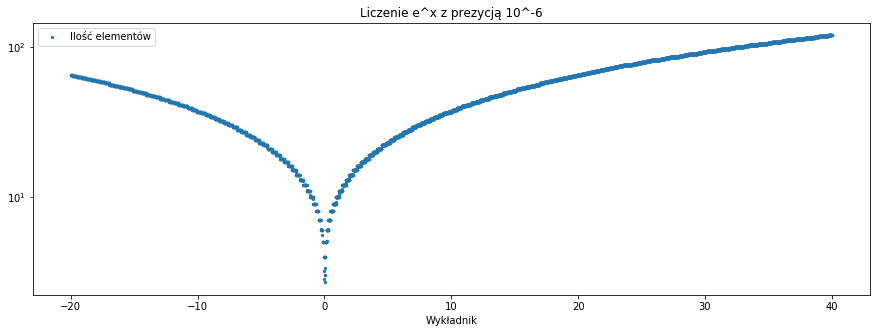

In [121]:
%matplotlib inline
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
from tqdm import tqdm
rcParams['figure.figsize'] = 15 ,5

plt.scatter(exponents_grouped, number_of_elements_grouped, s=5, label='Ilość elementów')
plt.yscale('symlog')
plt.title('Liczenie e^x z prezycją 10^-6')
plt.xlabel('Wykładnik')
plt.legend()
plt.show()